# TASK #1: UNDERSTAND THE PROBLEM AND BUSINESS CASE

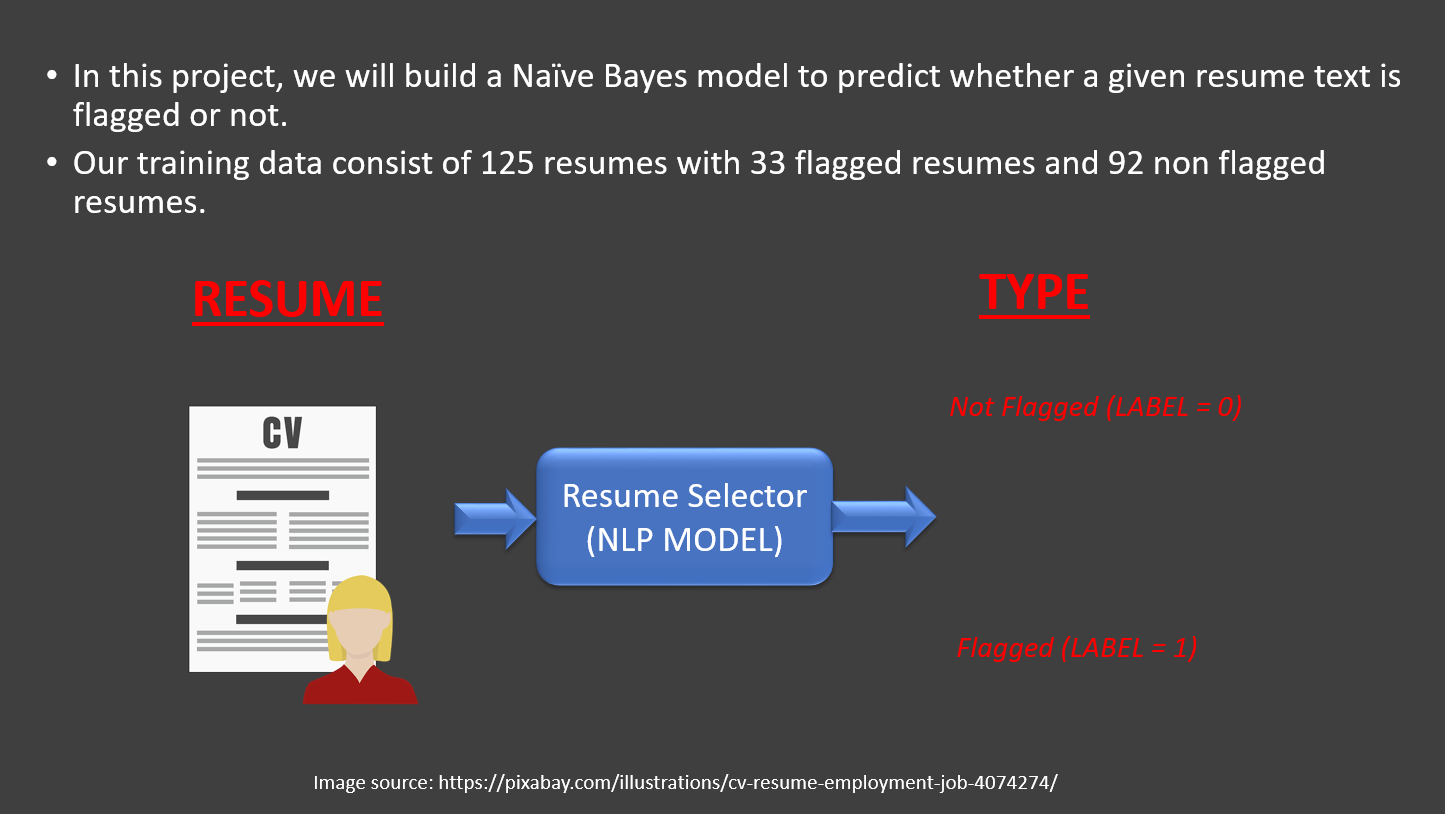

In [ ]:
# Data Source: https://www.kaggle.com/samdeeplearning/deepnlp

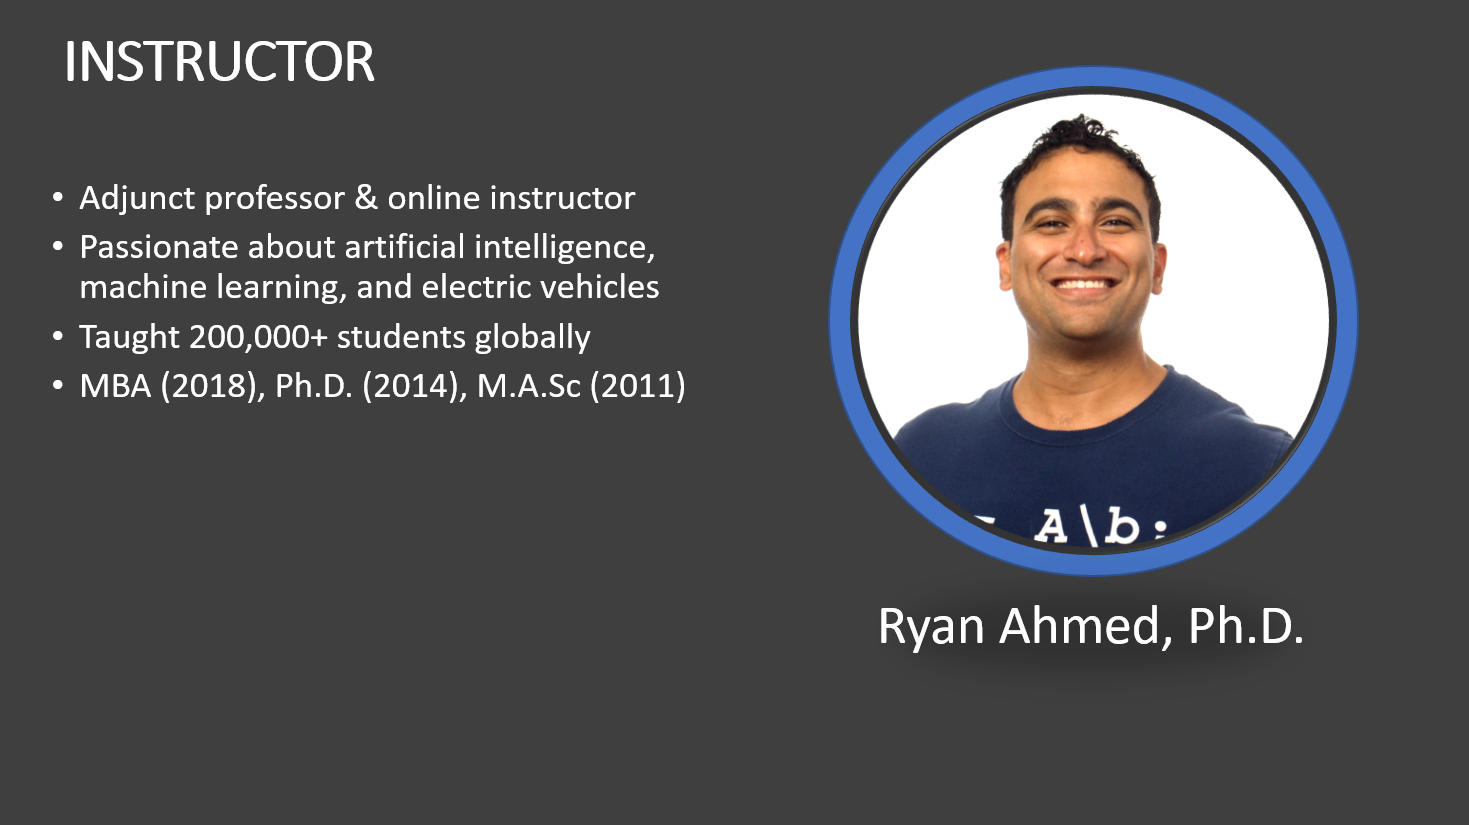

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [1]:
# install nltk
!pip install nltk


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [2]:
# install gensim
!pip install gensim


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [3]:
!pip install wordcloud


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [6]:
# load the data
resume_df=pd.read_csv('resume.csv',encoding ='latin-1')
resume_df

resume_id        class  \
0      resume_1  not_flagged   
1      resume_2  not_flagged   
2      resume_3  not_flagged   
3      resume_4  not_flagged   
4      resume_5      flagged   
..          ...          ...   
120  resume_121  not_flagged   
121  resume_122  not_flagged   
122  resume_123  not_flagged   
123  resume_124      flagged   
124  resume_125  not_flagged   

                                           resume_text  
0    \rCustomer Service Supervisor/Tier - Isabella ...  
1    \rEngineer / Scientist - IBM Microelectronics ...  
2    \rLTS Software Engineer Computational Lithogra...  
3     TUTOR\rWilliston VT - Email me on Indeed: ind...  
4    \rIndependent Consultant - Self-employed\rBurl...  
..                                                 ...  
120  \rBrattleboro VT - Email me on Indeed: indeed....  
121  \rResearch and Teaching Assistant - University...  
122  \rMedical Coder - Highly Skilled - Entry Level...  
123  \rWaterbury VT - Email me on Indeed: indeed.co...  
124  \rResearch and Development Scientist - Burling...  

[125 rows x 3 columns]

In [7]:
# data containing resume
resume_df=resume_df[['resume_text','class']]
resume_df

resume_text        class
0    \rCustomer Service Supervisor/Tier - Isabella ...  not_flagged
1    \rEngineer / Scientist - IBM Microelectronics ...  not_flagged
2    \rLTS Software Engineer Computational Lithogra...  not_flagged
3     TUTOR\rWilliston VT - Email me on Indeed: ind...  not_flagged
4    \rIndependent Consultant - Self-employed\rBurl...      flagged
..                                                 ...          ...
120  \rBrattleboro VT - Email me on Indeed: indeed....  not_flagged
121  \rResearch and Teaching Assistant - University...  not_flagged
122  \rMedical Coder - Highly Skilled - Entry Level...  not_flagged
123  \rWaterbury VT - Email me on Indeed: indeed.co...      flagged
124  \rResearch and Development Scientist - Burling...  not_flagged

[125 rows x 2 columns]

MINI CHALLENGE #1: 
- Print the first and last elements in the dataframe. 

In [8]:
resume_df.head(10)

resume_text        class
0  \rCustomer Service Supervisor/Tier - Isabella ...  not_flagged
1  \rEngineer / Scientist - IBM Microelectronics ...  not_flagged
2  \rLTS Software Engineer Computational Lithogra...  not_flagged
3   TUTOR\rWilliston VT - Email me on Indeed: ind...  not_flagged
4  \rIndependent Consultant - Self-employed\rBurl...      flagged
5  \rPoultney VT - Email me on Indeed: indeed.com...  not_flagged
6  \rMedical Laboratory Scientist (Special Chemis...  not_flagged
7  Statistician\rBurlington VT - Email me on Inde...      flagged
8  Research technician\rBurlington VT - Email me ...  not_flagged
9  Barbara Hennessey-Elzohairy\rNewport VT - Emai...  not_flagged

In [9]:
resume_df.tail(10)

resume_text        class
115  \rEssex Jct VT - Email me on Indeed: indeed.co...      flagged
116   Postdoctoral Associate - University of Vermon...  not_flagged
117  \rSpatial Analyst and UAV Flight Operator - Sp...      flagged
118   | Bioinformatics Analyst\rBurlington VT - Ema...      flagged
119  Professional\rNewbury VT - Email me on Indeed:...  not_flagged
120  \rBrattleboro VT - Email me on Indeed: indeed....  not_flagged
121  \rResearch and Teaching Assistant - University...  not_flagged
122  \rMedical Coder - Highly Skilled - Entry Level...  not_flagged
123  \rWaterbury VT - Email me on Indeed: indeed.co...      flagged
124  \rResearch and Development Scientist - Burling...  not_flagged

# TASK #3: PERFORM EXPLORATORY DATA ANALYSIS

In [10]:
# obtain dataframe information
resume_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   resume_text  125 non-null    object
 1   class        125 non-null    object
dtypes: object(2)
memory usage: 2.1+ KB


In [11]:
# check for null values
resume_df.isnull()

resume_text  class
0          False  False
1          False  False
2          False  False
3          False  False
4          False  False
..           ...    ...
120        False  False
121        False  False
122        False  False
123        False  False
124        False  False

[125 rows x 2 columns]

In [12]:
resume_df['class'].value_counts()

not_flagged    92
flagged        33
Name: class, dtype: int64

In [13]:
resume_df['class']=resume_df['class'].apply(lambda x:1 if x == 'flagged' else 0 )
resume_df

resume_text  class
0    \rCustomer Service Supervisor/Tier - Isabella ...      0
1    \rEngineer / Scientist - IBM Microelectronics ...      0
2    \rLTS Software Engineer Computational Lithogra...      0
3     TUTOR\rWilliston VT - Email me on Indeed: ind...      0
4    \rIndependent Consultant - Self-employed\rBurl...      1
..                                                 ...    ...
120  \rBrattleboro VT - Email me on Indeed: indeed....      0
121  \rResearch and Teaching Assistant - University...      0
122  \rMedical Coder - Highly Skilled - Entry Level...      0
123  \rWaterbury VT - Email me on Indeed: indeed.co...      1
124  \rResearch and Development Scientist - Burling...      0

[125 rows x 2 columns]

MINI CHALLENGE #2:
- Divide the DataFrame into two, one that belongs to class 0 and 1. Do we have a balanced dataset?

In [14]:
class_0_df=resume_df[resume_df['class']==0]
class_0_df

resume_text  class
0    \rCustomer Service Supervisor/Tier - Isabella ...      0
1    \rEngineer / Scientist - IBM Microelectronics ...      0
2    \rLTS Software Engineer Computational Lithogra...      0
3     TUTOR\rWilliston VT - Email me on Indeed: ind...      0
5    \rPoultney VT - Email me on Indeed: indeed.com...      0
..                                                 ...    ...
119  Professional\rNewbury VT - Email me on Indeed:...      0
120  \rBrattleboro VT - Email me on Indeed: indeed....      0
121  \rResearch and Teaching Assistant - University...      0
122  \rMedical Coder - Highly Skilled - Entry Level...      0
124  \rResearch and Development Scientist - Burling...      0

[92 rows x 2 columns]

In [15]:
class_1_df=resume_df[resume_df['class']==1]
class_1_df

resume_text  class
4    \rIndependent Consultant - Self-employed\rBurl...      1
7    Statistician\rBurlington VT - Email me on Inde...      1
10   Barbara Kurth\rResearch Assistant Professor Cl...      1
15   Caroline Clauson Work Study Student\rBrattlebo...      1
17   Chelsea Martin\rEnvironmental Scientist - Vana...      1
18   Christopher Fusting Data Science Consultant\rB...      1
23   David Grass\rCity Research Scientist - Environ...      1
24   David Lucero Public Health Analyst\rBurlington...      1
27   Drew Burkhard\rEnvironmental Scientist Meets M...      1
31   Eric Anderson Data Scientist\rBrattleboro VT -...      1
32   Eric Hedeman\rBurlington VT - Email me on Inde...      1
33   Erik McCullen Senior Scientist/Engineer\rFairf...      1
38   Geoffrey Abbott Software / Research Engineer\r...      1
39   George Gallant Staff Engineer / Scientist\rUnd...      1
42   Guang Zeng\rResearch Scientist/Imaging Special...      1
49   Jake Kittell\rPrincipal - Happiness Tool Co. I...      1
52   John Klein\rCastleton VT - Email me on Indeed:...      1
56   Joseph Lea\rUndergraduate Research Assistant -...      1
60   Kenneth Sikora Entrepreneur research scientist...      1
70   Mark Mckenna\rChief Scientist Unmanned Systems...      1
75   Melissa Burbank\rBrattleboro VT - Email me on ...      1
79   Michael Fink\rData Scientist/TPM - Smart Resou...      1
87   Nisha Chaube Graduate Teaching Assistant\rColc...      1
101  Shannon Warburton Senior Scientist - MERCK AND...      1
104  Steven Brady\rPostdoctoral Fellow - VT Coopera...      1
106  Swaminathan Prasanna Senior UI Developer - ATS...      1
107  Tam Tran\rShelburne VT - Email me on Indeed: i...      1
112  William Sribney\rStatistical Software Develope...      1
114   Ph.D.\rSouth Royalton VT - Email me on Indeed...      1
115  \rEssex Jct VT - Email me on Indeed: indeed.co...      1
117  \rSpatial Analyst and UAV Flight Operator - Sp...      1
118   | Bioinformatics Analyst\rBurlington VT - Ema...      1
123  \rWaterbury VT - Email me on Indeed: indeed.co...      1

# TASK #4: PERFORM DATA CLEANING

In [18]:
resume_df['resume_text']=resume_df['resume_text'].apply(lambda x: x.replace('\r',' '))
resume_df

resume_text  class
0     Customer Service Supervisor/Tier - Isabella C...      0
1     Engineer / Scientist - IBM Microelectronics D...      0
2     LTS Software Engineer Computational Lithograp...      0
3     TUTOR Williston VT - Email me on Indeed: inde...      0
4     Independent Consultant - Self-employed Burlin...      1
..                                                 ...    ...
120   Brattleboro VT - Email me on Indeed: indeed.c...      0
121   Research and Teaching Assistant - University ...      0
122   Medical Coder - Highly Skilled - Entry Level ...      0
123   Waterbury VT - Email me on Indeed: indeed.com...      1
124   Research and Development Scientist - Burlingt...      0

[125 rows x 2 columns]

In [19]:
# download nltk packages
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [20]:
# download nltk packages
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [23]:
# Get additional stopwords from nltk
from nltk.corpus import stopwords
stop_words=stopwords.words('english')
stop_words.extend(['from','subject','re','edu','email','com'])

In [24]:
# Remove stop words and remove words with 2 or less characters
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2 and token not in stop_words:
            result.append(token)
            
    return ' '.join(result)

In [25]:
# Cleaned text
resume_df['cleaned']=resume_df['resume_text'].apply(preprocess)

In [26]:
resume_df

resume_text  class  \
0     Customer Service Supervisor/Tier - Isabella C...      0   
1     Engineer / Scientist - IBM Microelectronics D...      0   
2     LTS Software Engineer Computational Lithograp...      0   
3     TUTOR Williston VT - Email me on Indeed: inde...      0   
4     Independent Consultant - Self-employed Burlin...      1   
..                                                 ...    ...   
120   Brattleboro VT - Email me on Indeed: indeed.c...      0   
121   Research and Teaching Assistant - University ...      0   
122   Medical Coder - Highly Skilled - Entry Level ...      0   
123   Waterbury VT - Email me on Indeed: indeed.com...      1   
124   Research and Development Scientist - Burlingt...      0   

                                               cleaned  
0    customer service supervisor tier isabella cata...  
1    engineer scientist ibm division westford alber...  
2    lts software engineer computational lithograph...  
3    tutor williston alec schwartz work experience ...  
4    independent consultant self employed burlingto...  
..                                                 ...  
120  brattleboro bcc skilled presenter trainer micr...  
121  research teaching assistant university vermont...  
122  medical coder highly skilled entry level sudbu...  
123  waterbury bec willing relocate authorized work...  
124  research development scientist burlington labo...  

[125 rows x 3 columns]

In [27]:
print(resume_df['cleaned'][0])

customer service supervisor tier isabella catalog company south burlington aecf work experience customer service supervisor tier isabella catalog company shelburne august present customer service visual set display website maintenance supervise customer service team popular catalog company manage day day issues resolution customer upset ensure customer satisfaction troubleshoot order shipping issues lost transit order errors damages manage resolve escalated customer calls ensure customer satisfaction assist customers order placing cross selling upselling catalog merchandise set display sample merchandise catalog library customer pick area facility website clean adding images type product information proofreading administrative assistant events coordinator office services assistant eileen fisher irvington february july support director architecture architecture coordinator daily activities including preparing monthly expense reports scheduling calendar maintenance arranging aspects trav

In [28]:
print(resume_df['resume_text'][0])

 Customer Service Supervisor/Tier - Isabella Catalog Company South Burlington VT - Email me on Indeed: indeed.com/r//49f8c9aecf490d26 WORK EXPERIENCE Customer Service Supervisor/Tier Isabella Catalog Company - Shelburne VT - August 2015 to Present 2 Customer Service/Visual Set Up & Display/Website Maintenance ¢ Supervise customer service team of a popular catalog company ¢ Manage day to day issues and resolution of customer upset to ensure customer satisfaction ¢ Troubleshoot order and shipping issues: lost in transit order errors damages ¢ Manage and resolve escalated customer calls to ensure customer satisfaction ¢ Assist customers with order placing cross-selling/upselling of catalog merchandise ¢ Set up and display of sample merchandise in catalog library as well as customer pick-up area of the facility ¢ Website clean-up: adding images type up product information proofreading Administrative Assistant /Events Coordinator/Office Services Assistant Eileen Fisher Inc - I

# TASK #5: VISUALIZE CLEANED DATASET

<AxesSubplot: ylabel='count'>

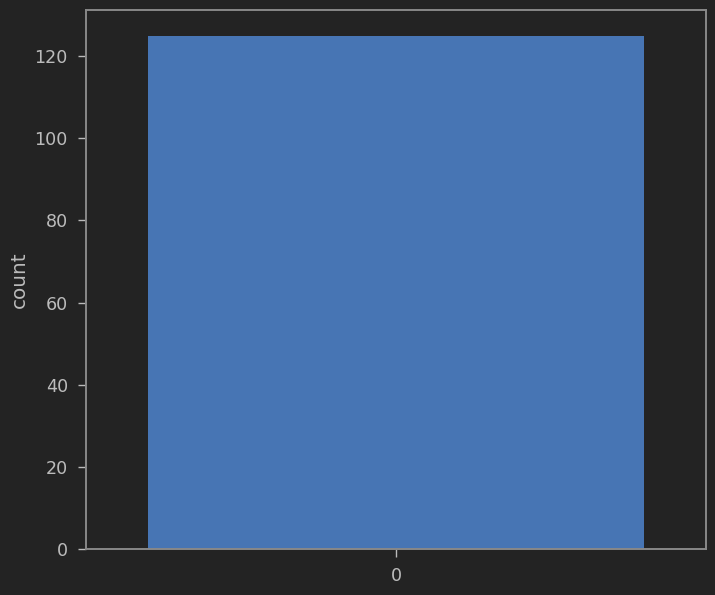

In [30]:
# Plot the counts of flagged vs not flagged
sns.countplot(resume_df['class'], label='Count Plot')

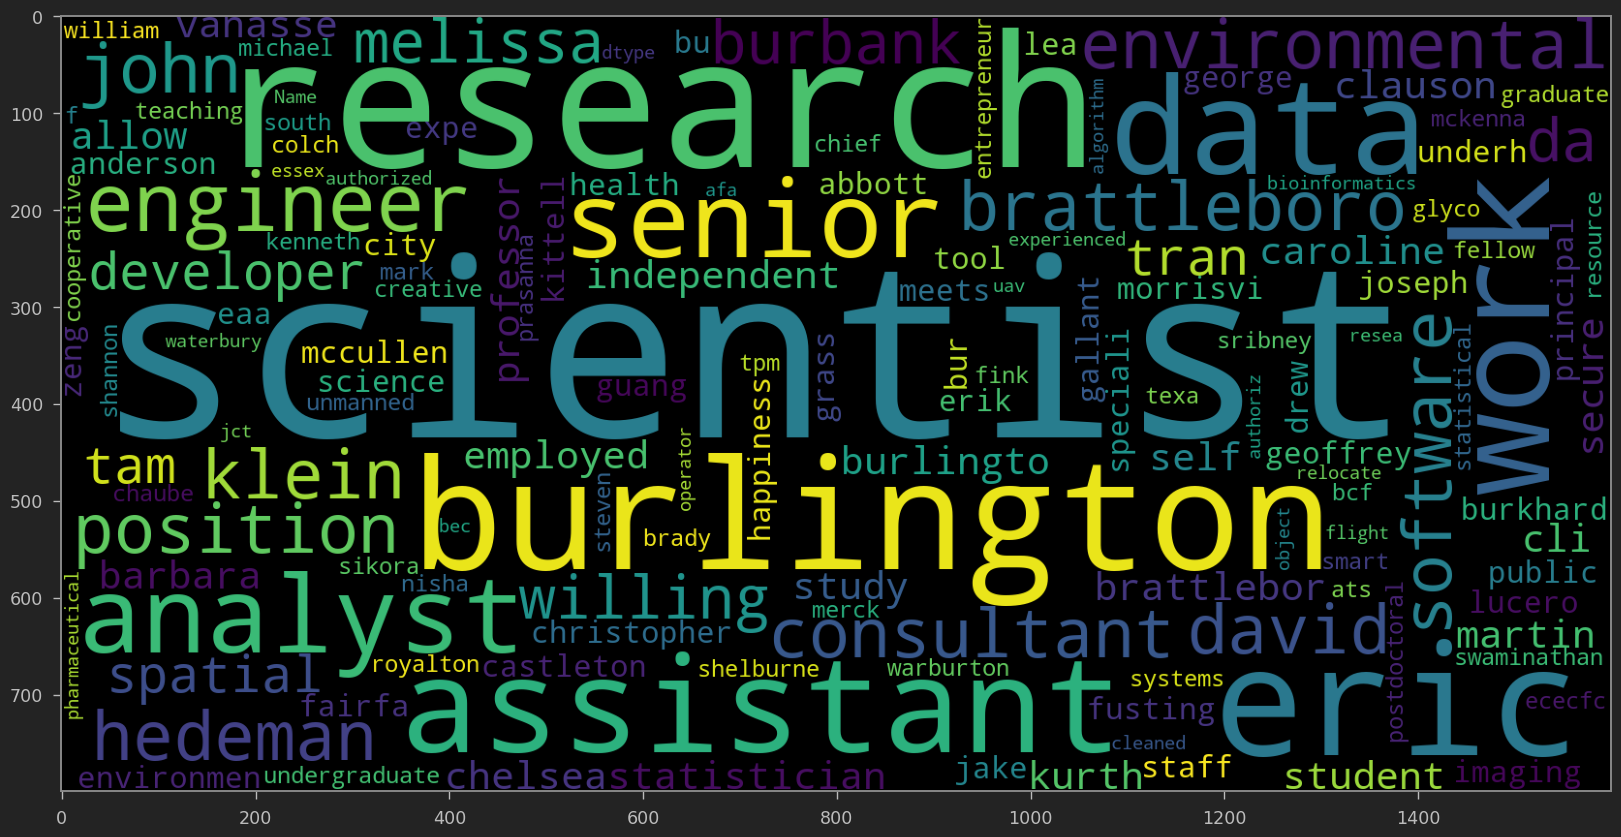

In [33]:
# plot the word cloud for text that is flagged
plt.figure(figsize = (20,20)) 
wc=WordCloud(max_words=2000,width=1600,height=800,stopwords=stop_words).generate(str(resume_df[resume_df['class']==1].cleaned))
plt.imshow(wc)

MINI CHALLENGE #3:
- Plot the wordcloud for class #1 

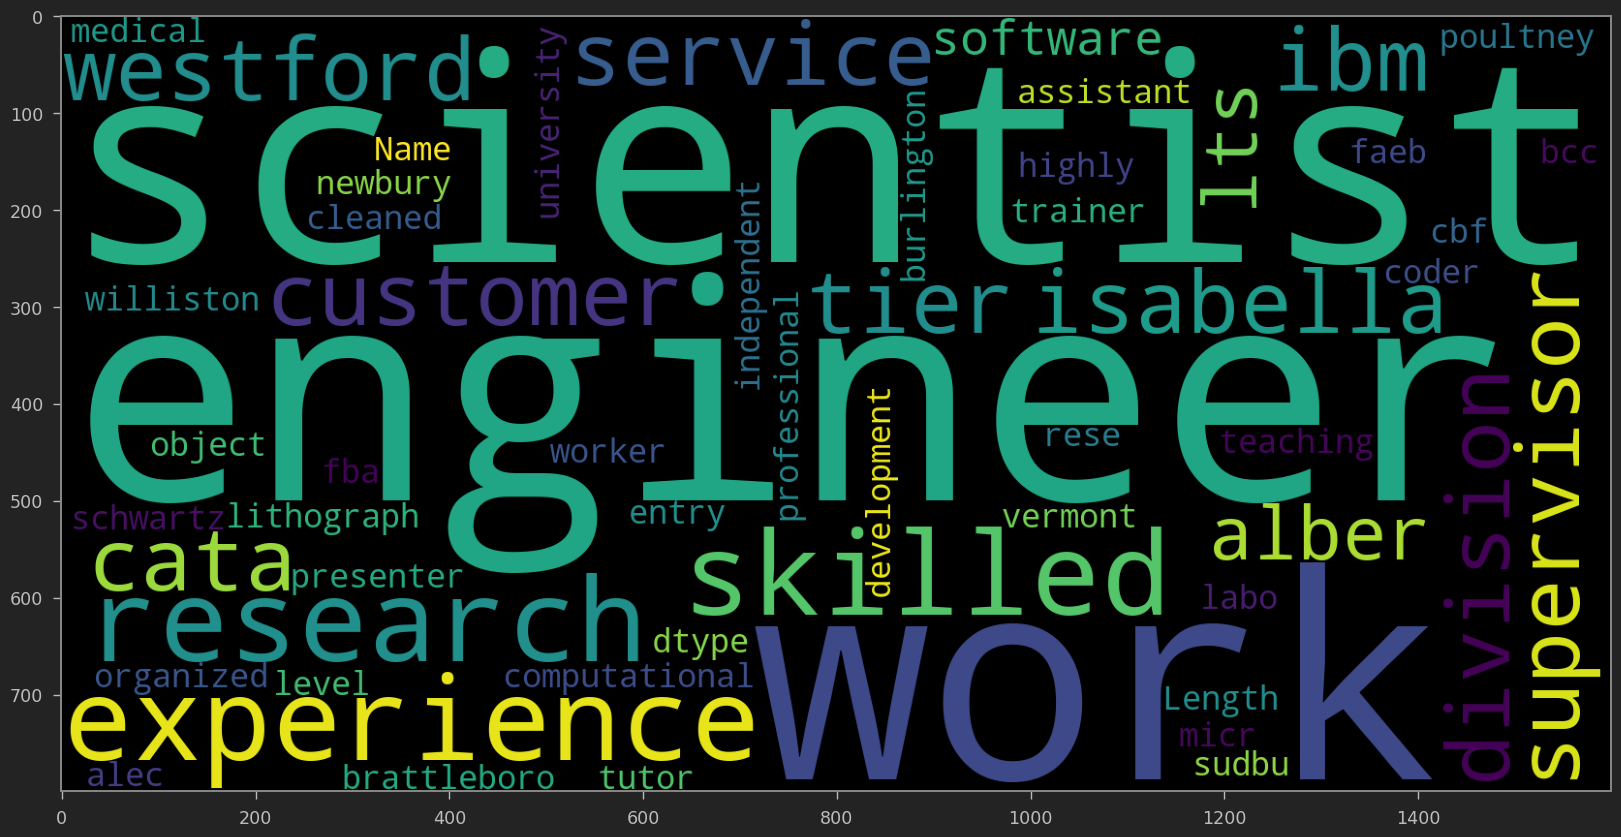

In [34]:
plt.figure(figsize = (20,20)) 
wc=WordCloud(max_words=2000,width=1600,height=800,stopwords=stop_words).generate(str(resume_df[resume_df['class']==0].cleaned))
plt.imshow(wc)

# TASK #6: PREPARE THE DATA BY APPLYING COUNT VECTORIZER

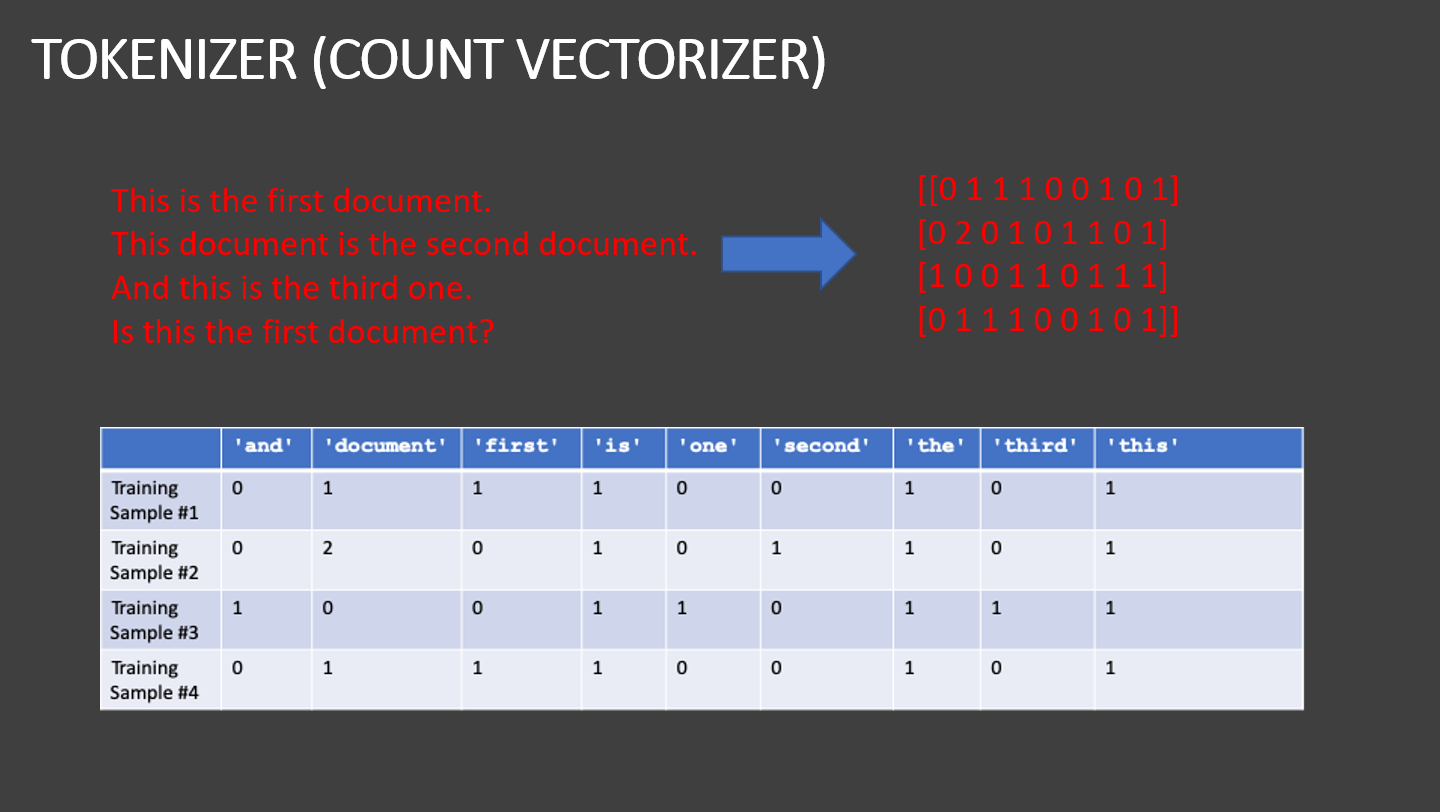

In [35]:
# CountVectorizer example
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first document.','This document is the second document.','And this is the third one.','Is this the first document?']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)


In [41]:
print(vectorizer.get_feature_names_out())

['aaalac' 'aabb' 'aac' ... 'ãæcomputer' 'ètravel' 'ô_torrent']


In [37]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [38]:
# Applying CountVectorier to the cleaned text
vectorizer = CountVectorizer()
CountVectorizer=vectorizer.fit_transform(resume_df['cleaned'])

In [42]:
print(vectorizer.get_feature_names_out())

['aaalac' 'aabb' 'aac' ... 'ãæcomputer' 'ètravel' 'ô_torrent']


In [43]:
print(CountVectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# TASK #7: UNDERSTAND THE THEORY AND INTUITION BEHIND NAIVE BAYES CLASSIFIERS - PART #1

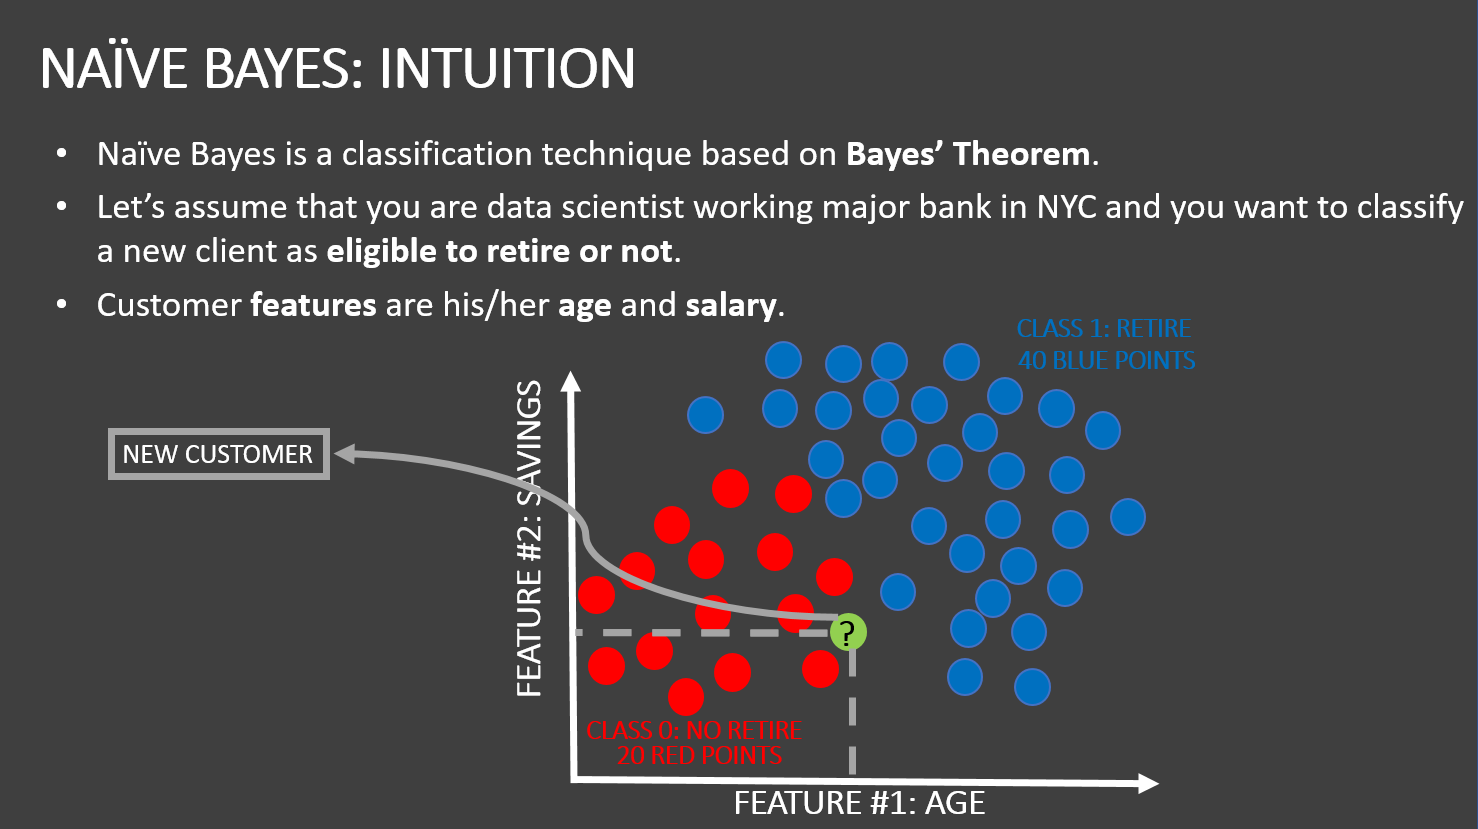

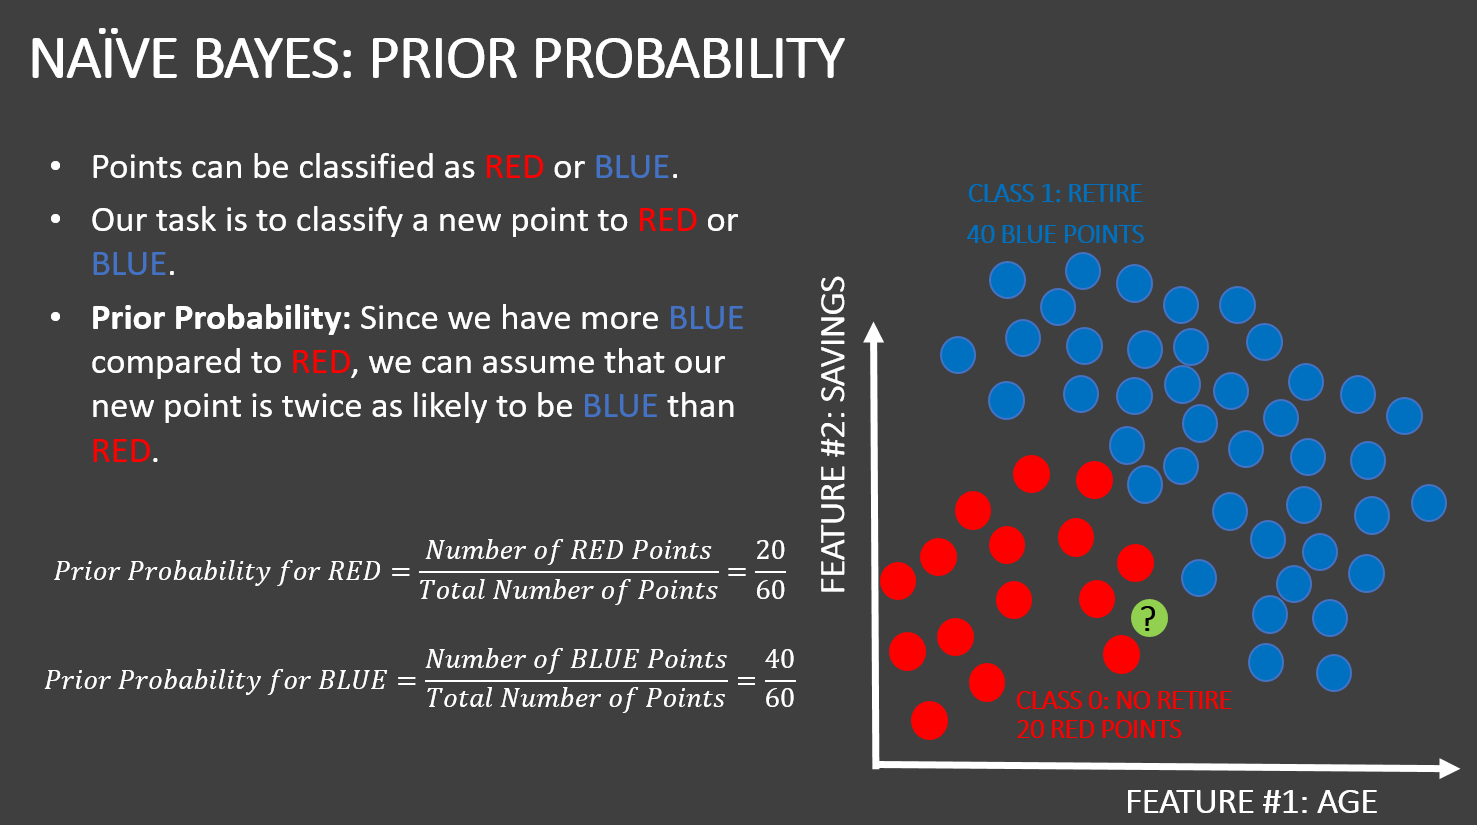

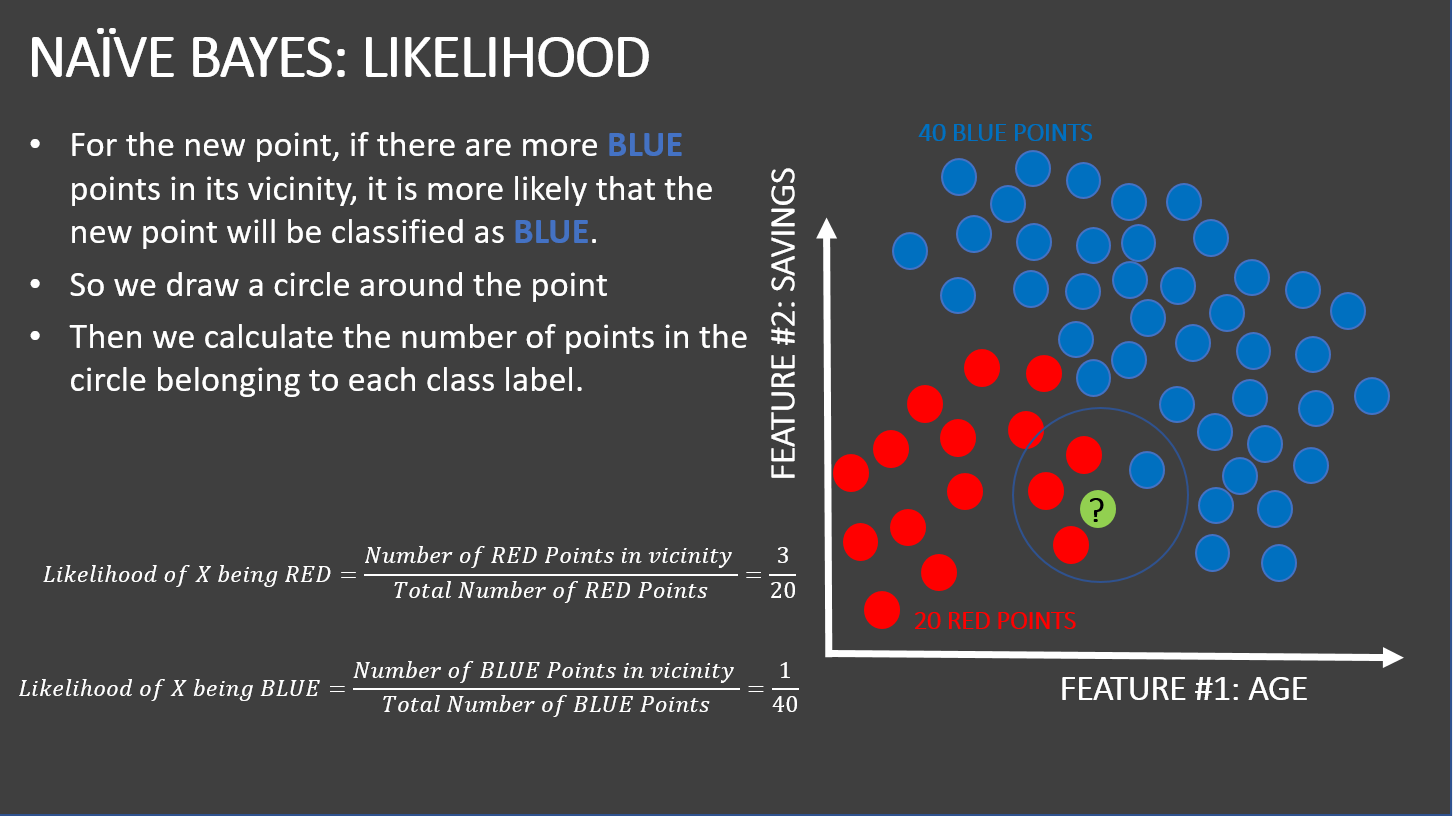

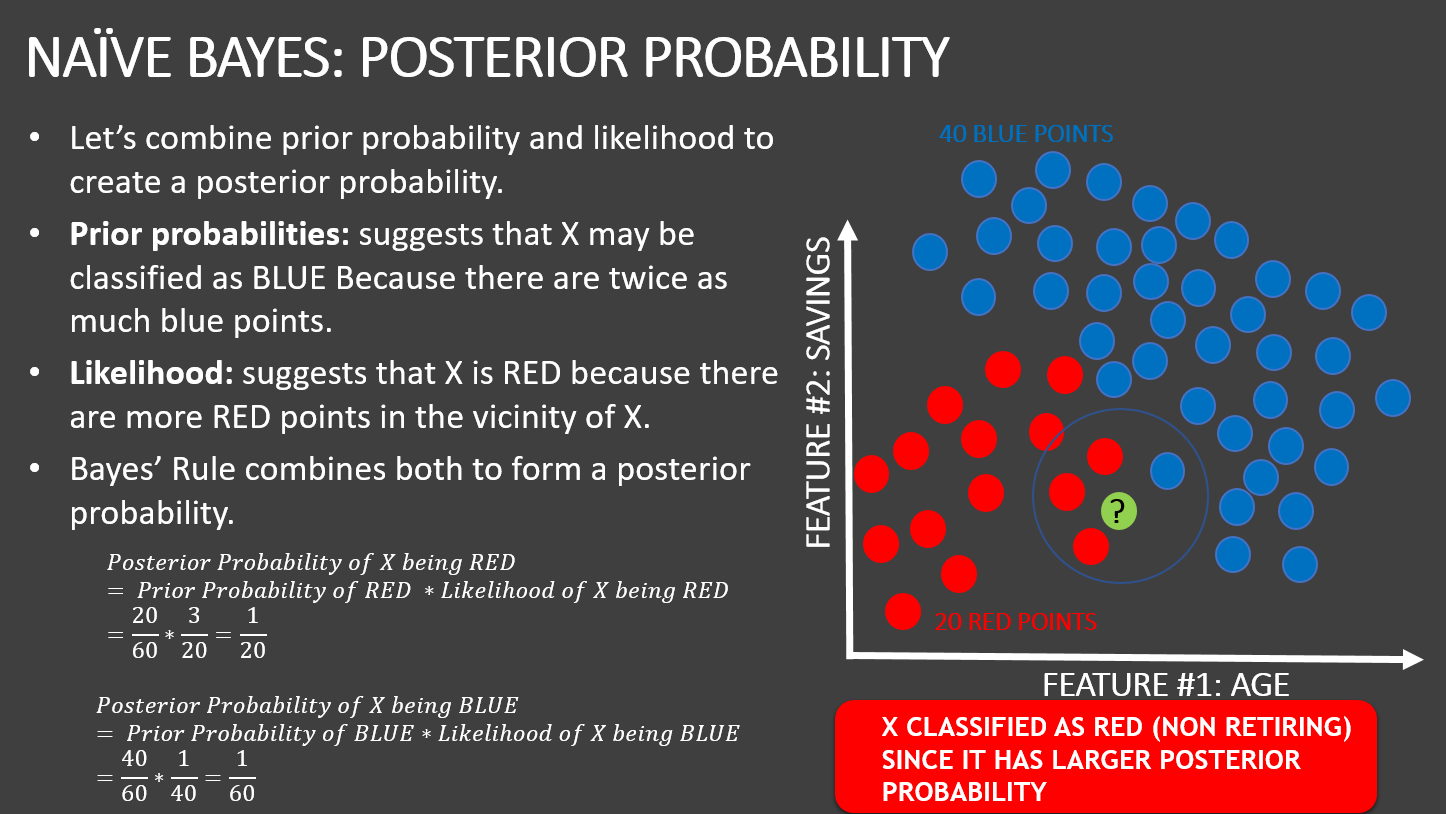

# TASK #8: UNDERSTAND THE THEORY AND INTUITION BEHIND NAIVE BAYES CLASSIFIERS - PART #2

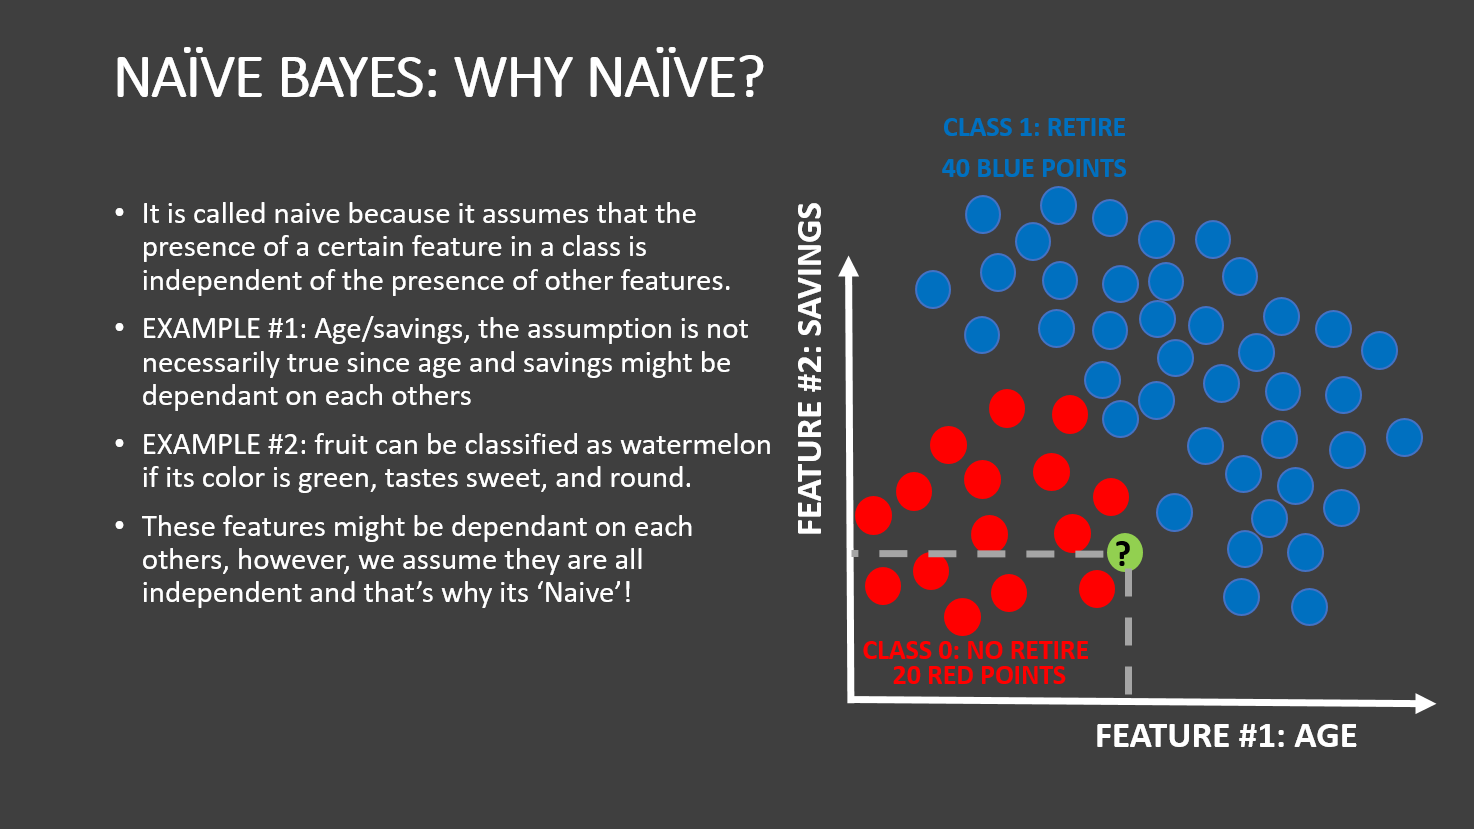

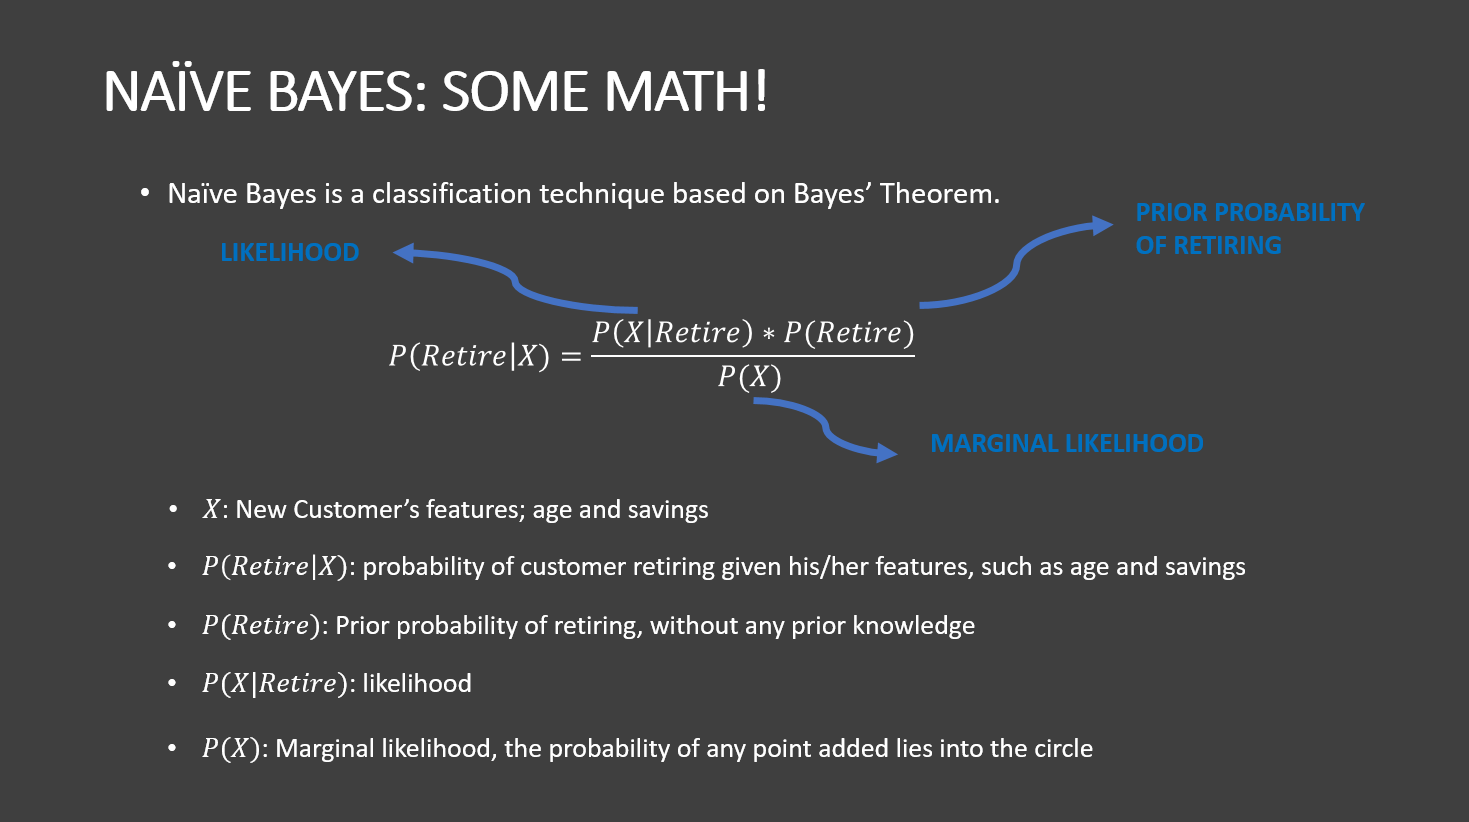

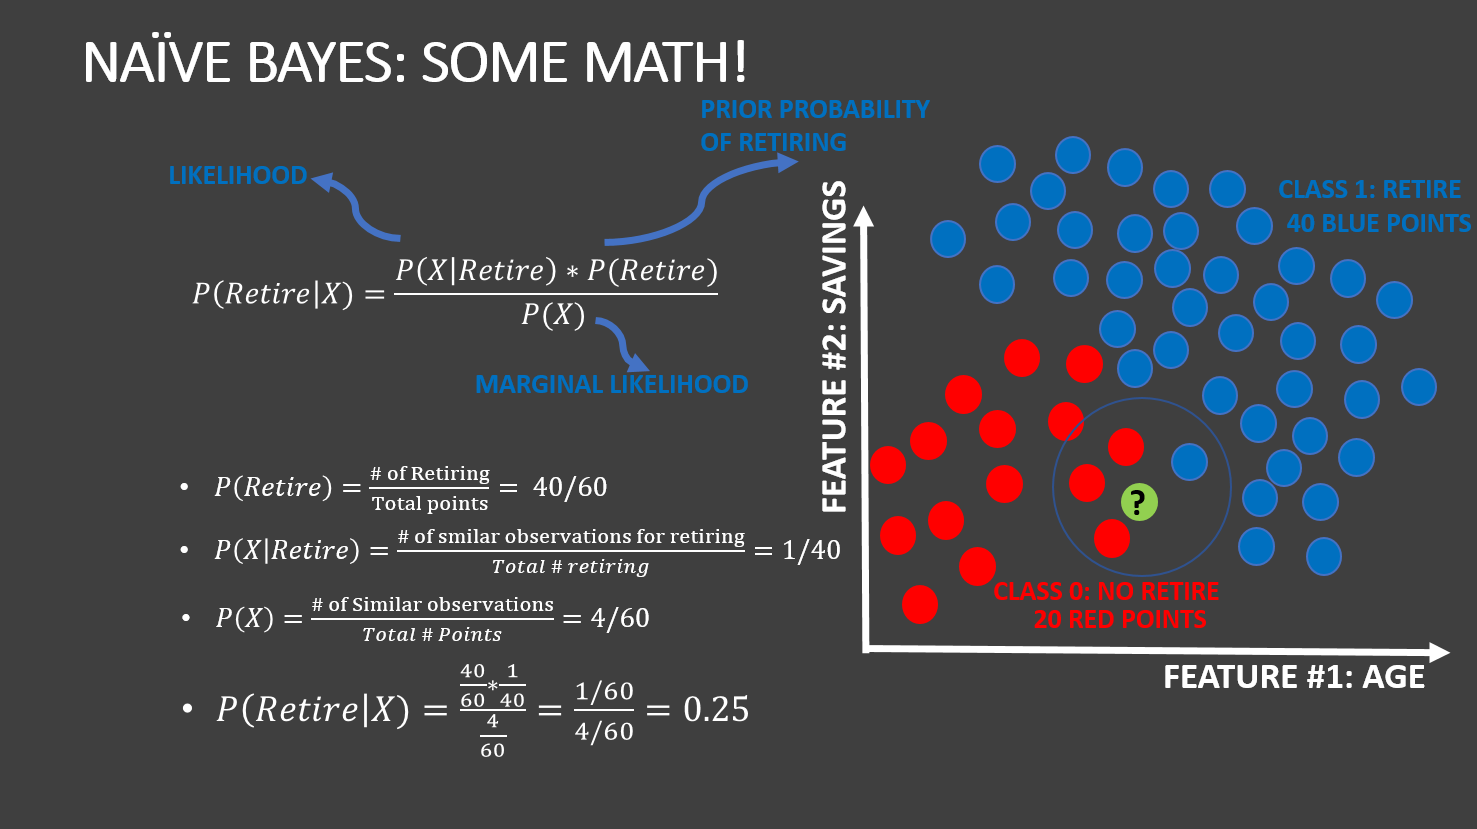

MINI CHALLENGE #4:
- Calculate the probability of the red class (non-retiring).

In [44]:
resume_df['class'].value_counts()


0    92
1    33
Name: class, dtype: int64

# TASK#9: TRAIN NAIVE BAYES CLASSIFIER MODEL

In [46]:
X=CountVectorizer

In [48]:
y=resume_df['class']

In [49]:
X.shape

(125, 10384)

In [50]:
y.shape

(125,)

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [52]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)


MultinomialNB()

MINI CHALLENGE #5:
- Split the data into 25% testing and 75% training and perform a sanity check



In [53]:
from sklearn.model_selection import train_test_split

# Split 75% training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)


Training Data Shape: (93, 10384)
Testing Data Shape: (32, 10384)


# TASK #10: ASSESS TRAINED MODEL PERFORMANCE


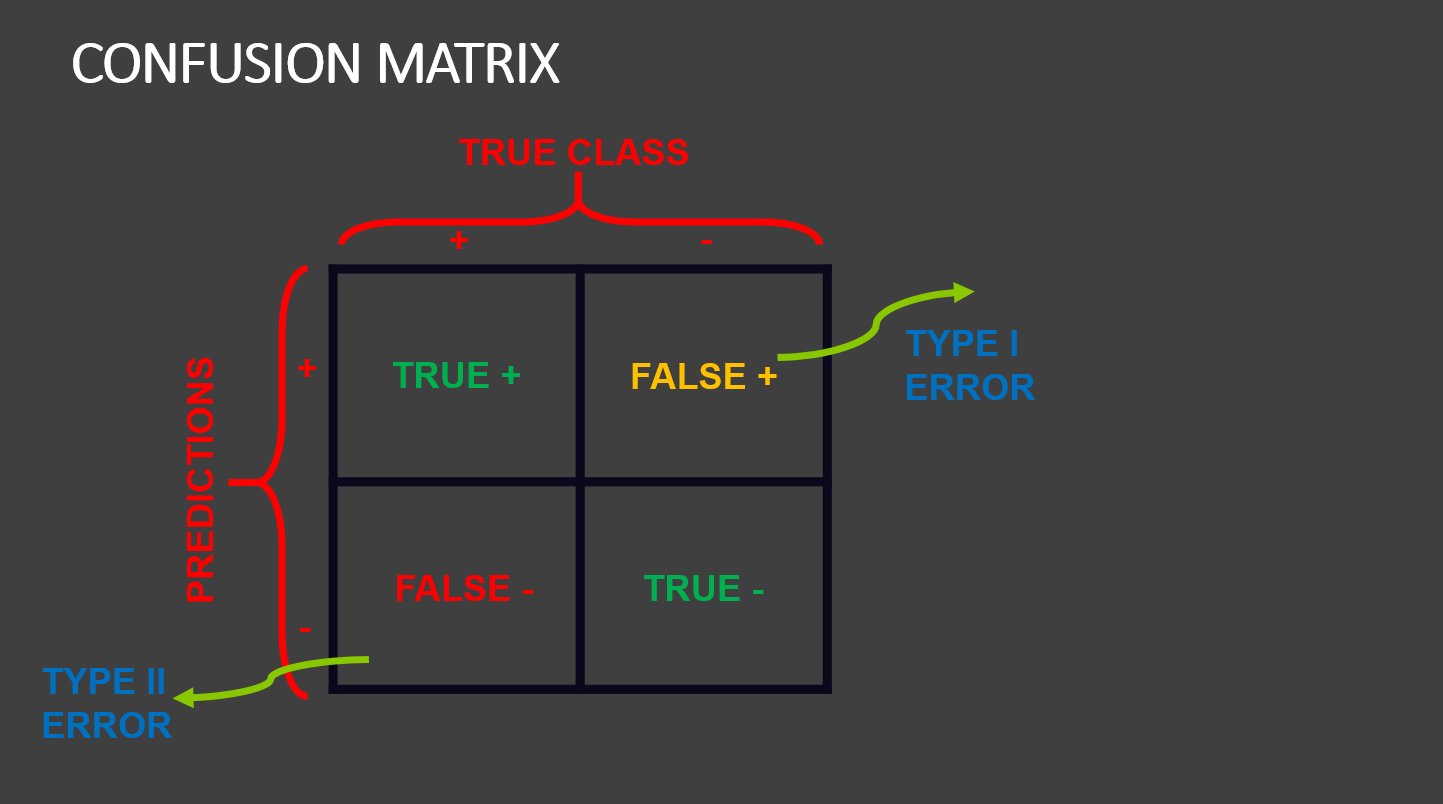

<AxesSubplot: >

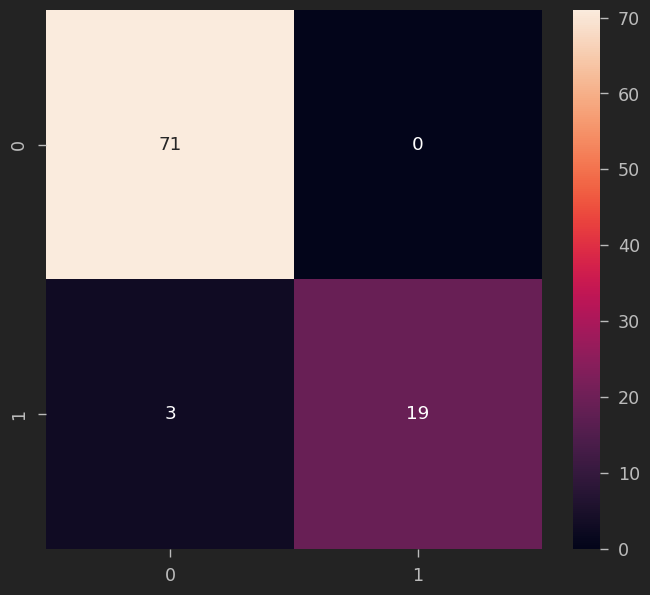

In [54]:
# Predicting the performance on train data
y_predict_train = NB_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot = True)

<AxesSubplot: >

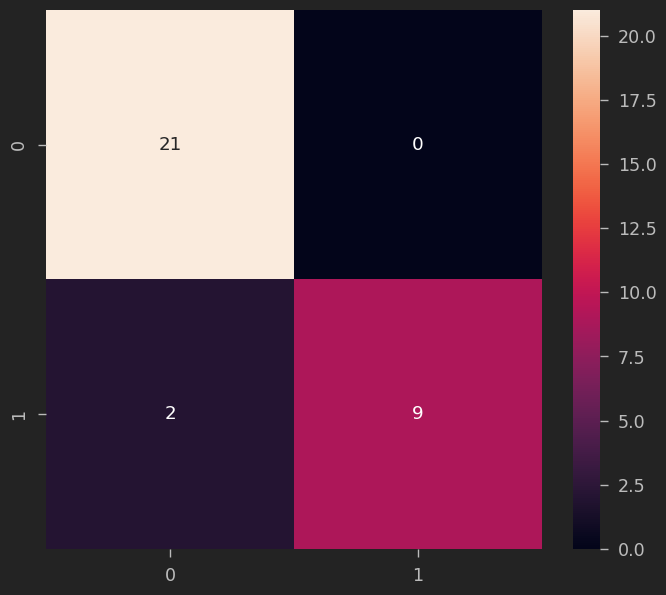

In [55]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True)

In [56]:
# classification report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        21
           1       1.00      0.82      0.90        11

    accuracy                           0.94        32
   macro avg       0.96      0.91      0.93        32
weighted avg       0.94      0.94      0.94        32



MINI CHALLENGE #6:
- Retrain the model after spliting the data into 30% testing and 70% training and assess model performance


              precision    recall  f1-score   support

           0       0.79      0.96      0.87        28
           1       0.75      0.30      0.43        10

    accuracy                           0.79        38
   macro avg       0.77      0.63      0.65        38
weighted avg       0.78      0.79      0.75        38



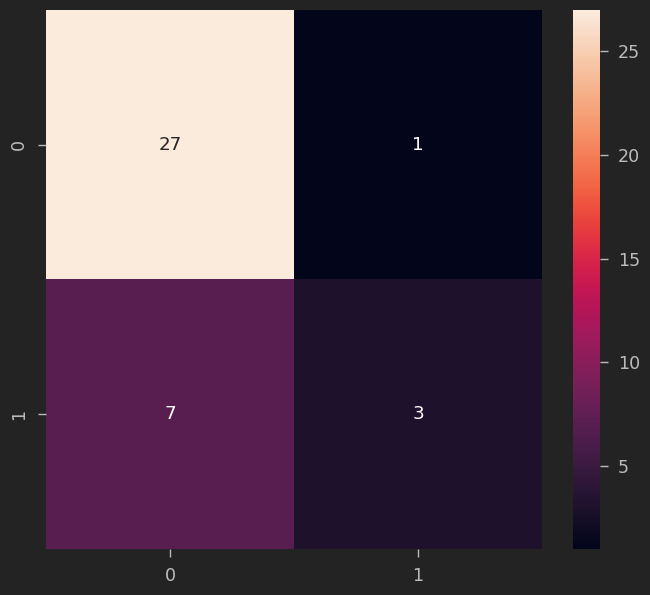

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

print(classification_report(y_test, y_predict_test))


# GREAT JOB!

# MINI CHALLENGES SOLUTIONS

MINI CHALLENGE #1 SOLUTION: 
- Print the first and last elements in the dataframe. 

In [58]:
resume_df.head()

resume_text  class  \
0   Customer Service Supervisor/Tier - Isabella C...      0   
1   Engineer / Scientist - IBM Microelectronics D...      0   
2   LTS Software Engineer Computational Lithograp...      0   
3   TUTOR Williston VT - Email me on Indeed: inde...      0   
4   Independent Consultant - Self-employed Burlin...      1   

                                             cleaned  
0  customer service supervisor tier isabella cata...  
1  engineer scientist ibm division westford alber...  
2  lts software engineer computational lithograph...  
3  tutor williston alec schwartz work experience ...  
4  independent consultant self employed burlingto...

In [59]:
resume_df.tail()

resume_text  class  \
120   Brattleboro VT - Email me on Indeed: indeed.c...      0   
121   Research and Teaching Assistant - University ...      0   
122   Medical Coder - Highly Skilled - Entry Level ...      0   
123   Waterbury VT - Email me on Indeed: indeed.com...      1   
124   Research and Development Scientist - Burlingt...      0   

                                               cleaned  
120  brattleboro bcc skilled presenter trainer micr...  
121  research teaching assistant university vermont...  
122  medical coder highly skilled entry level sudbu...  
123  waterbury bec willing relocate authorized work...  
124  research development scientist burlington labo...

MINI CHALLENGE #2 SOLUTION:
- Divide the DataFrame into two, one that belongs to class 0 and 1. Do we have a balanced dataset?

In [60]:
class_0_df = resume_df[resume_df['class']==0]
class_0_df

resume_text  class  \
0     Customer Service Supervisor/Tier - Isabella C...      0   
1     Engineer / Scientist - IBM Microelectronics D...      0   
2     LTS Software Engineer Computational Lithograp...      0   
3     TUTOR Williston VT - Email me on Indeed: inde...      0   
5     Poultney VT - Email me on Indeed: indeed.com/...      0   
..                                                 ...    ...   
119  Professional Newbury VT - Email me on Indeed: ...      0   
120   Brattleboro VT - Email me on Indeed: indeed.c...      0   
121   Research and Teaching Assistant - University ...      0   
122   Medical Coder - Highly Skilled - Entry Level ...      0   
124   Research and Development Scientist - Burlingt...      0   

                                               cleaned  
0    customer service supervisor tier isabella cata...  
1    engineer scientist ibm division westford alber...  
2    lts software engineer computational lithograph...  
3    tutor williston alec schwartz work experience ...  
5    poultney cbf fba organized independent worker ...  
..                                                 ...  
119  professional newbury faeb work experience rese...  
120  brattleboro bcc skilled presenter trainer micr...  
121  research teaching assistant university vermont...  
122  medical coder highly skilled entry level sudbu...  
124  research development scientist burlington labo...  

[92 rows x 3 columns]

In [61]:
class_1_df = resume_df[resume_df['class']==1]
class_1_df

resume_text  class  \
4     Independent Consultant - Self-employed Burlin...      1   
7    Statistician Burlington VT - Email me on Indee...      1   
10   Barbara Kurth Research Assistant Professor Cli...      1   
15   Caroline Clauson Work Study Student Brattlebor...      1   
17   Chelsea Martin Environmental Scientist - Vanas...      1   
18   Christopher Fusting Data Science Consultant Bu...      1   
23   David Grass City Research Scientist - Environm...      1   
24   David Lucero Public Health Analyst Burlington ...      1   
27   Drew Burkhard Environmental Scientist Meets Me...      1   
31   Eric Anderson Data Scientist Brattleboro VT - ...      1   
32   Eric Hedeman Burlington VT - Email me on Indee...      1   
33   Erik McCullen Senior Scientist/Engineer Fairfa...      1   
38   Geoffrey Abbott Software / Research Engineer B...      1   
39   George Gallant Staff Engineer / Scientist Unde...      1   
42   Guang Zeng Research Scientist/Imaging Speciali...      1   
49   Jake Kittell Principal - Happiness Tool Co. In...      1   
52   John Klein Castleton VT - Email me on Indeed: ...      1   
56   Joseph Lea Undergraduate Research Assistant - ...      1   
60   Kenneth Sikora Entrepreneur research scientist...      1   
70   Mark Mckenna Chief Scientist Unmanned Systems ...      1   
75   Melissa Burbank Brattleboro VT - Email me on I...      1   
79   Michael Fink Data Scientist/TPM - Smart Resour...      1   
87   Nisha Chaube Graduate Teaching Assistant Colch...      1   
101  Shannon Warburton Senior Scientist - MERCK AND...      1   
104  Steven Brady Postdoctoral Fellow - VT Cooperat...      1   
106  Swaminathan Prasanna Senior UI Developer - ATS...      1   
107  Tam Tran Shelburne VT - Email me on Indeed: in...      1   
112  William Sribney Statistical Software Developer...      1   
114   Ph.D. South Royalton VT - Email me on Indeed:...      1   
115   Essex Jct VT - Email me on Indeed: indeed.com...      1   
117   Spatial Analyst and UAV Flight Operator - Spa...      1   
118   | Bioinformatics Analyst Burlington VT - Emai...      1   
123   Waterbury VT - Email me on Indeed: indeed.com...      1   

                                               cleaned  
4    independent consultant self employed burlingto...  
7    statistician burlington secure position allow ...  
10   barbara kurth research assistant professor cli...  
15   caroline clauson work study student brattlebor...  
17   chelsea martin environmental scientist vanasse...  
18   christopher fusting data science consultant bu...  
23   david grass city research scientist environmen...  
24   david lucero public health analyst burlington ...  
27   drew burkhard environmental scientist meets me...  
31   eric anderson data scientist brattleboro eric ...  
32   eric hedeman burlington eric hedeman work expe...  
33   erik mccullen senior scientist engineer fairfa...  
38   geoffrey abbott software research engineer bur...  
39   george gallant staff engineer scientist underh...  
42   guang zeng research scientist imaging speciali...  
49   jake kittell principal happiness tool morrisvi...  
52   john klein castleton john klein eaa willing re...  
56   joseph lea undergraduate research assistant re...  
60   kenneth sikora entrepreneur research scientist...  
70   mark mckenna chief scientist unmanned systems ...  
75   melissa burbank brattleboro melissa burbank da...  
79   michael fink data scientist tpm smart resource...  
87   nisha chaube graduate teaching assistant colch...  
101  shannon warburton senior scientist merck glyco...  
104  steven brady postdoctoral fellow cooperative f...  
106  swaminathan prasanna senior developer ats texa...  
107  tam tran shelburne tam tran ececfc creative da...  
112  william sribney statistical software developer...  
114  south royalton bcf experienced algorithm resea...  
115  essex jct scientist position pharmaceutical in...  
117  spatial analyst uav flight operator spatial an...  
118  bio

MINI CHALLENGE #3 SOLUTION:
- Plot the wordcloud for class #1 

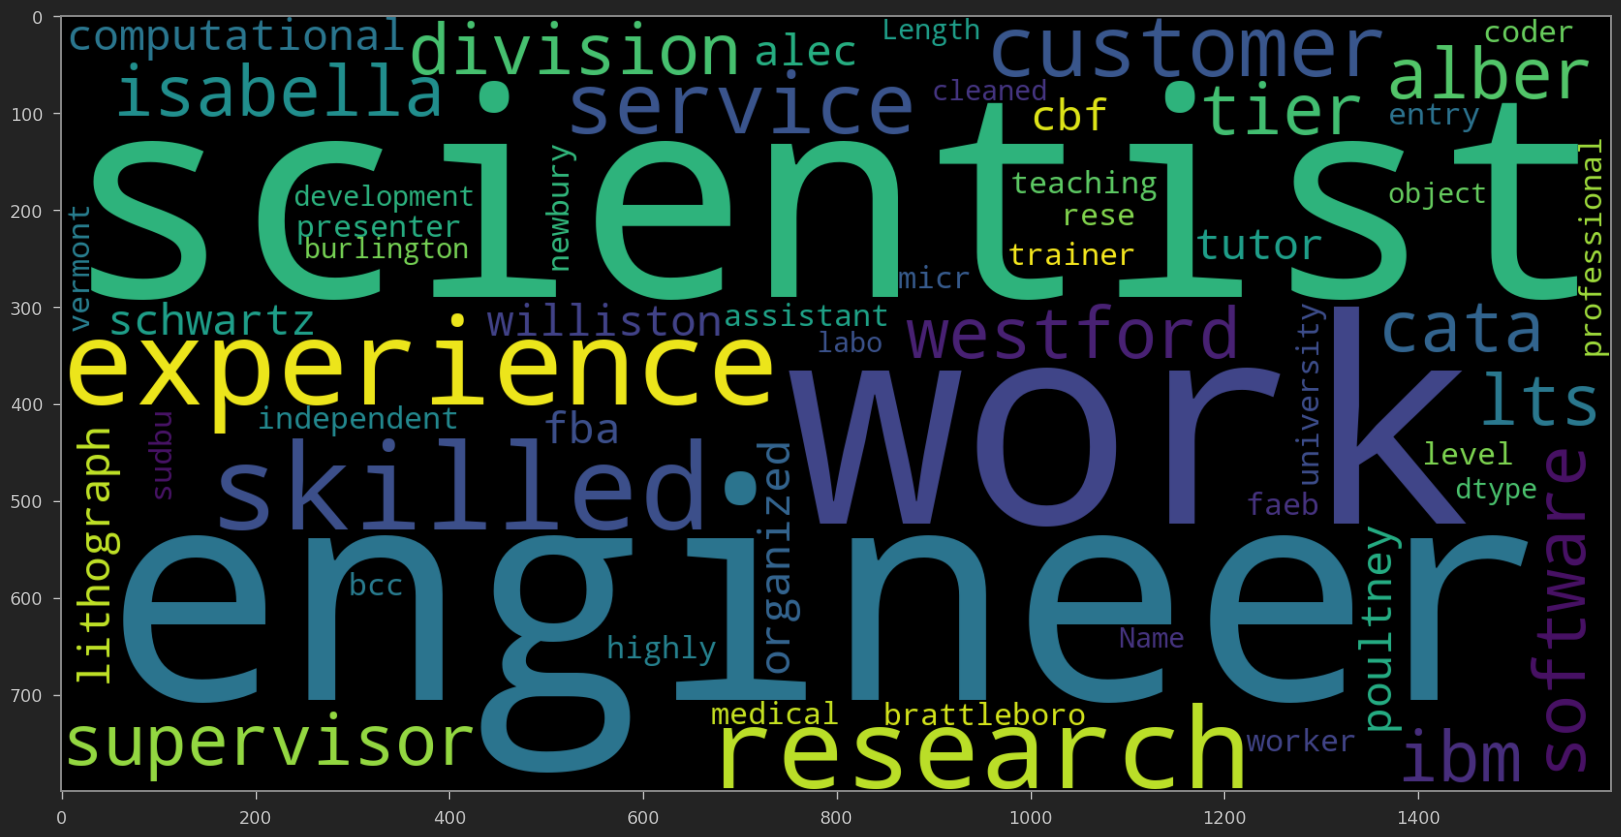

In [62]:
# plot the word cloud for text that is not flagged
plt.figure(figsize = (20, 20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(str(resume_df[resume_df['class'] == 0].cleaned))
plt.imshow(wc , interpolation = 'bilinear')

MINI CHALLENGE #4 SOLUTION:
- Calculate the probability of the red class (non-retiring).

In [65]:
# Calculate probability of the red class (non-retiring)
prob_red = resume_df['class'].value_counts(normalize=True)[0]

print("Probability of the Red Class (Non-Retiring):", prob_red)


Probability of the Red Class (Non-Retiring): 0.736


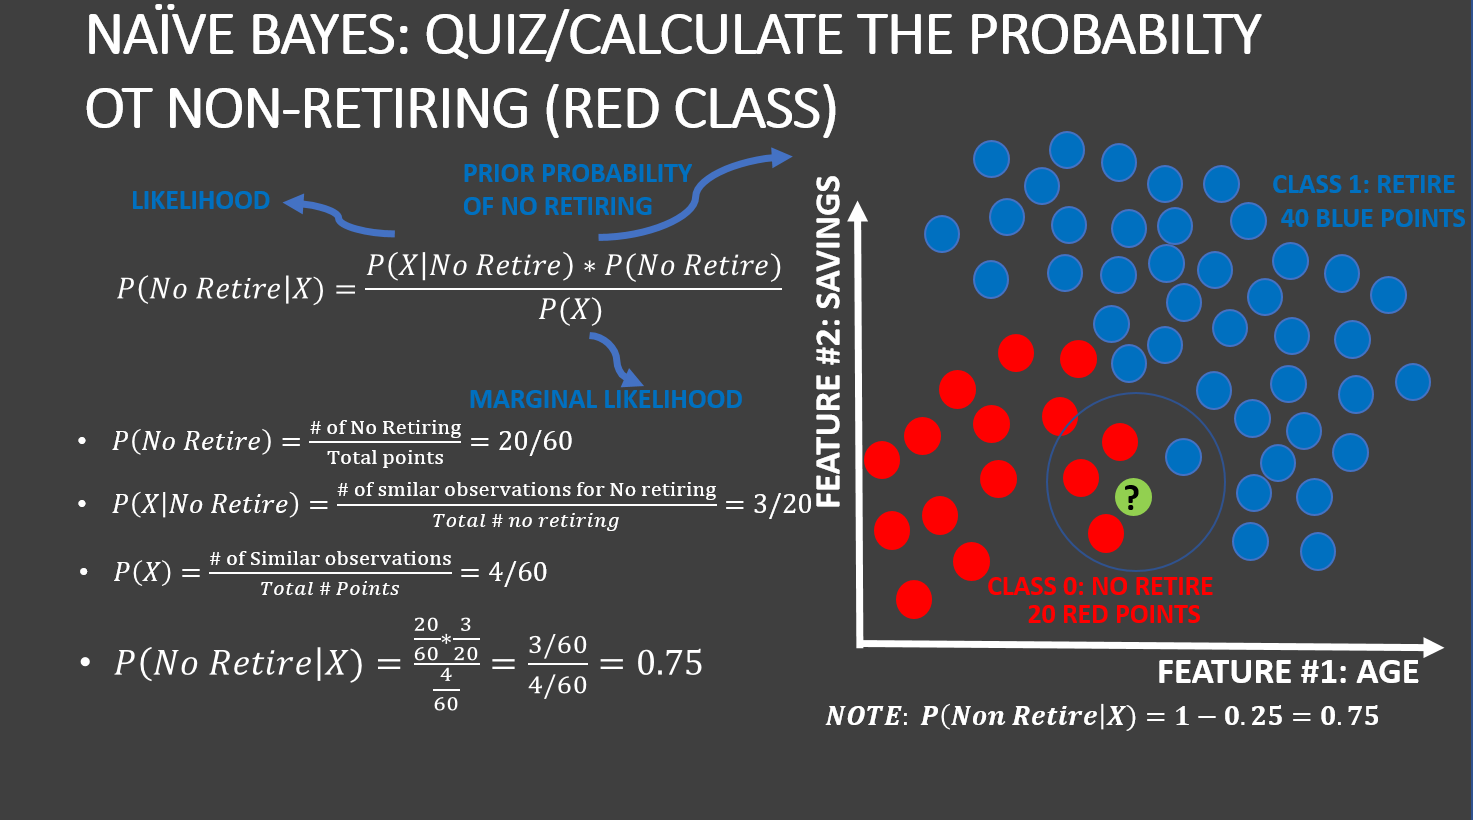

MINI CHALLENGE #5 SOLUTION:
- Split the data into 25% testing and 75% training and perform a sanity check


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

MINI CHALLENGE #6 SOLUTION:
- Retrain the model after spliting the data into 30% testing and 70% training and assess model performance


              precision    recall  f1-score   support

           0       0.77      0.88      0.82        26
           1       0.62      0.42      0.50        12

    accuracy                           0.74        38
   macro avg       0.70      0.65      0.66        38
weighted avg       0.72      0.74      0.72        38



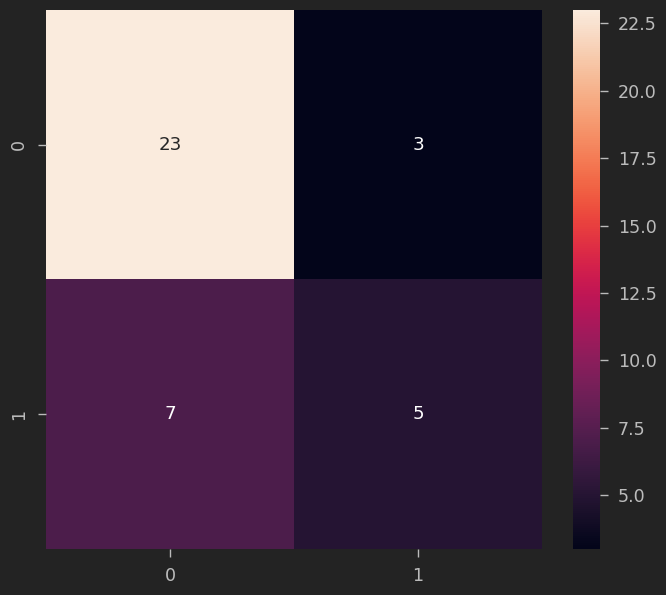

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True)

# classification report
print(classification_report(y_test, y_predict_test))